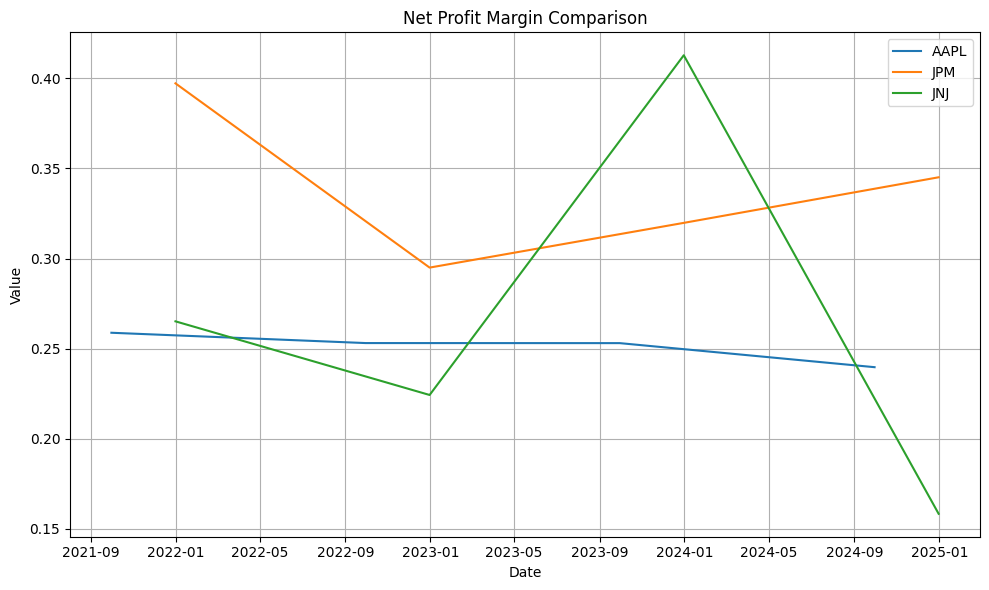

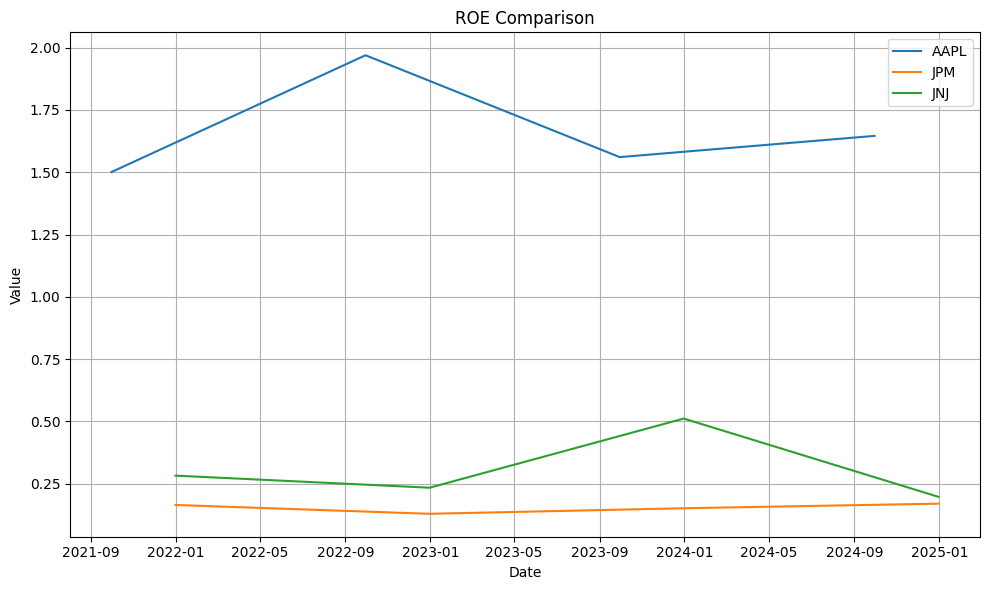

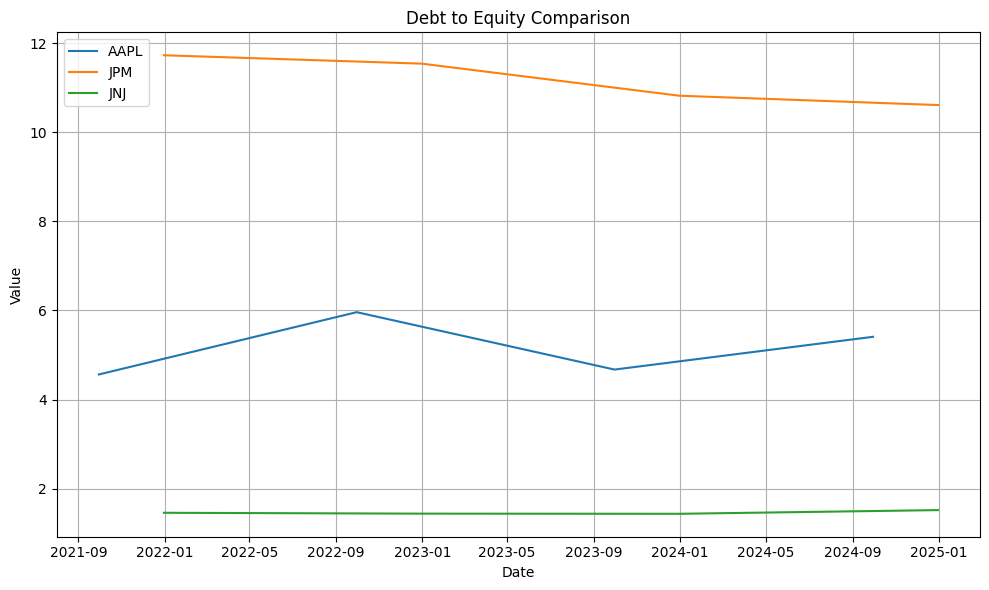

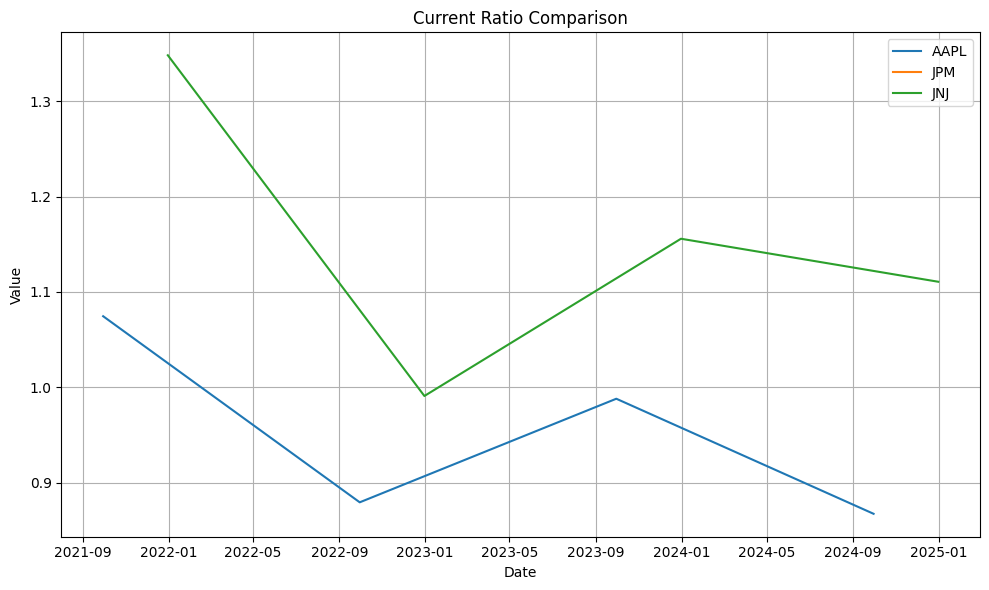

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

CLEANED_DATA_PATH = "data/cleaned"
companies = ["AAPL", "JPM", "JNJ"]

# --- Load all ratios ---
def load_ratios(company):
    path = f"{CLEANED_DATA_PATH}/{company}_financial_ratios.csv"
    df = pd.read_csv(path, index_col=0, parse_dates=True)
    df["Company"] = company
    return df

# --- Combine into single DataFrame ---
ratio_frames = [load_ratios(c) for c in companies]
all_ratios_df = pd.concat(ratio_frames)

# --- Melt for easier plotting ---
melted = all_ratios_df.reset_index().melt(
    id_vars=["index", "Company"],
    var_name="Ratio",
    value_name="Value"
).rename(columns={"index": "Date"})

# --- List of unique ratios ---
ratios = melted["Ratio"].unique()

# --- Plot each ratio across companies ---
for ratio in ratios:
    plt.figure(figsize=(10, 6))
    for company in companies:
        subset = melted[(melted["Company"] == company) & (melted["Ratio"] == ratio)]
        plt.plot(subset["Date"], subset["Value"], label=company)
    
    plt.title(f"{ratio.replace('_', ' ')} Comparison")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
